# ALL NBA TEAMS PROJECT (3)

In this notebook I do the following:

 - EDA

In [1]:
# load datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
player_stats_complete = pd.read_csv("player_stats_complete.csv").drop(['Unnamed: 0'], axis=1)

## Exploratory Data Analysis

In [3]:
# check info
player_stats_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164 entries, 0 to 5163
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              5164 non-null   object 
 1   season              5164 non-null   object 
 2   gs                  5164 non-null   int64  
 3   as                  5164 non-null   int64  
 4   age                 5164 non-null   int64  
 5   g                   5164 non-null   int64  
 6   mp                  5164 non-null   float64
 7   fg                  5164 non-null   float64
 8   fga                 5164 non-null   float64
 9   2p                  5164 non-null   float64
 10  2pa                 5164 non-null   float64
 11  3p                  5164 non-null   float64
 12  3pa                 5164 non-null   float64
 13  ft                  5164 non-null   float64
 14  fta                 5164 non-null   float64
 15  orb                 5164 non-null   float64
 16  drb   

In [4]:
# fill the null values with 'NA'
fill_na_list = ['pos_2', 'all_nba_team_label']

for col in fill_na_list:
    player_stats_complete[col] = player_stats_complete[col].fillna('NA')

# check again for NaN
player_stats_complete.isnull().sum().sum()

0

In [5]:
# change the value labels of 'all_nba_team_label'
player_stats_complete['all_nba_team_label'].replace({1: 'first',
                                                     2: 'second',
                                                     3: 'third'}, inplace=True)

player_stats_complete['all_nba_team_label'].value_counts()

all_nba_team_label
NA        4656
first      170
second     170
third      168
Name: count, dtype: int64

In [6]:
# check for numerical columns that are in fact categorical
for col in player_stats_complete.columns:
    display(col)
    display(player_stats_complete[col].nunique())

'player'

1131

'season'

35

'gs'

59

'as'

2

'age'

22

'g'

59

'mp'

286

'fg'

115

'fga'

229

'2p'

112

'2pa'

205

'3p'

49

'3pa'

111

'ft'

97

'fta'

118

'orb'

60

'drb'

106

'trb'

146

'ast'

123

'stl'

30

'blk'

45

'tov'

49

'pf'

39

'pts'

305

'fg%'

315

'2p%'

324

'3p%'

339

'ft%'

501

'ts%'

282

'efg%'

298

'ws'

196

'ortg'

64

'drtg'

37

'ows'

168

'dws'

87

'ws/48'

324

'obpm'

153

'dbpm'

81

'bpm'

184

'vorp'

125

'per'

256

'orb%'

177

'drb%'

310

'trb%'

228

'ast%'

477

'stl%'

44

'blk%'

94

'tov%'

211

'usg%'

302

'played_for'

3

'pos_1'

3

'pos_2'

4

'all_nba_team_label'

4

In [7]:
# convert 'all_nba_team_label', 'as', 'played_for' columns to object data type
player_stats_complete['all_nba_team_label'] = player_stats_complete['all_nba_team_label'].astype(object)
player_stats_complete['as'] = player_stats_complete['as'].astype(object)
player_stats_complete['played_for'] = player_stats_complete['played_for'].astype(object)

player_stats_complete.dtypes

player                 object
season                 object
gs                      int64
as                     object
age                     int64
g                       int64
mp                    float64
fg                    float64
fga                   float64
2p                    float64
2pa                   float64
3p                    float64
3pa                   float64
ft                    float64
fta                   float64
orb                   float64
drb                   float64
trb                   float64
ast                   float64
stl                   float64
blk                   float64
tov                   float64
pf                    float64
pts                   float64
fg%                   float64
2p%                   float64
3p%                   float64
ft%                   float64
ts%                   float64
efg%                  float64
ws                    float64
ortg                    int64
drtg                    int64
ows       

In [8]:
# split into categorical and numerical to analyse them separately
player_complete_cat = player_stats_complete.select_dtypes('object')
player_complete_num = player_stats_complete.select_dtypes(exclude='object')

display(player_complete_cat.head())
display(player_complete_num.head())

,player,season,as,played_for,pos_1,pos_2,all_nba_team_label
0,Bam Adebayo,2023-24,1,1,C,F,NA
1,Grayson Allen,2023-24,0,1,G,NA,NA
2,Jarrett Allen,2023-24,0,1,C,F,NA
3,Giannis Antetokounmpo,2023-24,1,1,F,G,NA
4,OG Anunoby,2023-24,0,2,F,NA,NA


,gs,age,g,mp,fg,fga,2p,2pa,3p,3pa,...,vorp,per,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%
0,43,26,43,34.5,7.6,15.0,7.6,14.8,0.0,0.3,...,1.4,19.5,7.1,27.9,17.3,19.4,1.5,2.8,11.9,26.0
1,47,28,47,32.9,4.3,8.4,1.7,3.2,2.6,5.2,...,1.1,13.5,2.4,11.1,7.0,12.5,1.3,1.7,12.7,13.9
2,46,25,46,30.5,6.4,9.9,6.4,9.8,0.0,0.1,...,2.0,22.1,13.2,25.0,19.3,13.4,1.3,3.4,13.4,18.9
3,51,29,51,35.0,11.5,18.9,11.0,17.1,0.5,1.8,...,4.6,29.2,8.2,26.4,17.6,30.5,1.9,2.5,12.9,33.1
4,41,26,41,34.1,5.8,11.7,3.7,6.1,2.1,5.5,...,0.7,13.5,3.1,10.6,6.8,9.4,1.9,1.8,10.7,17.6


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


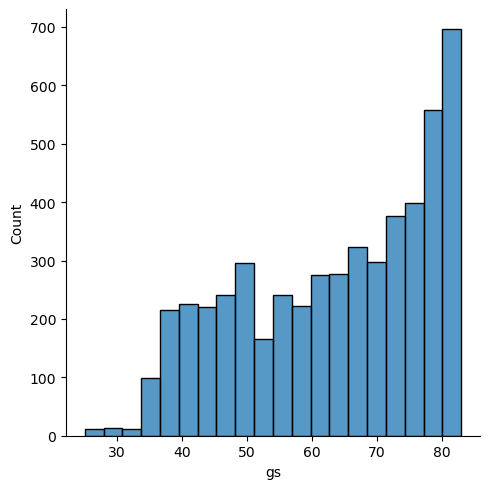

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


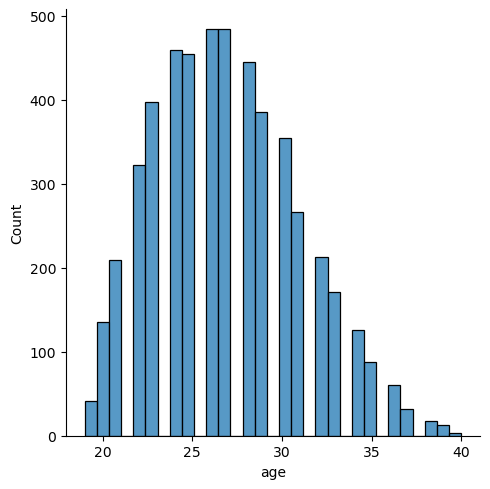

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


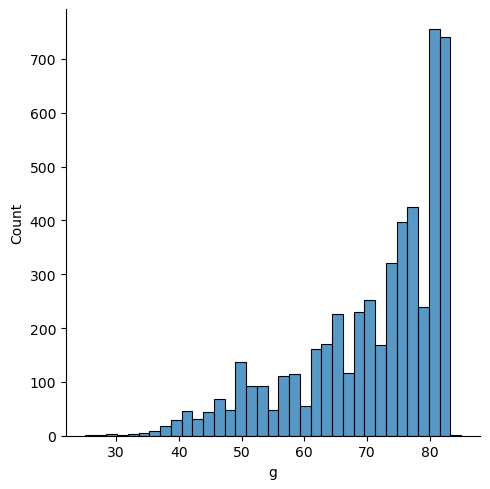

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


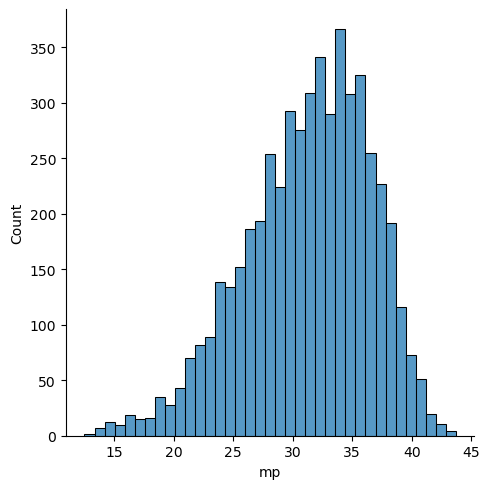

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


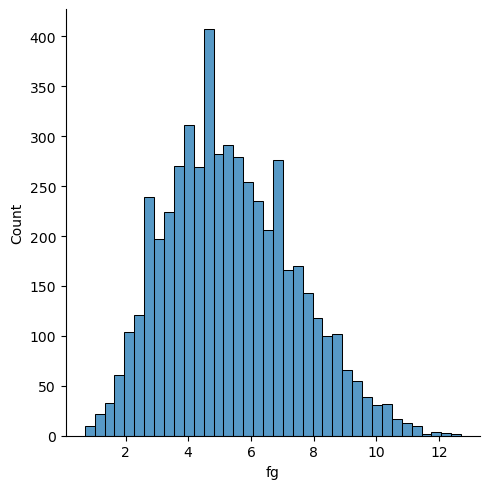

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


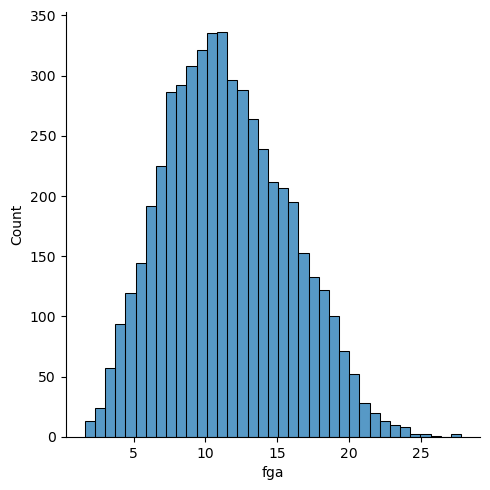

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


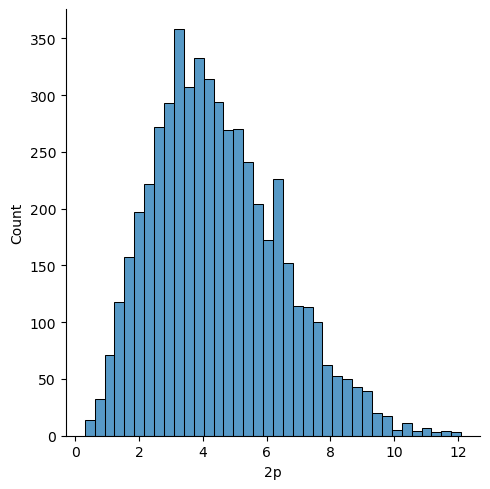

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


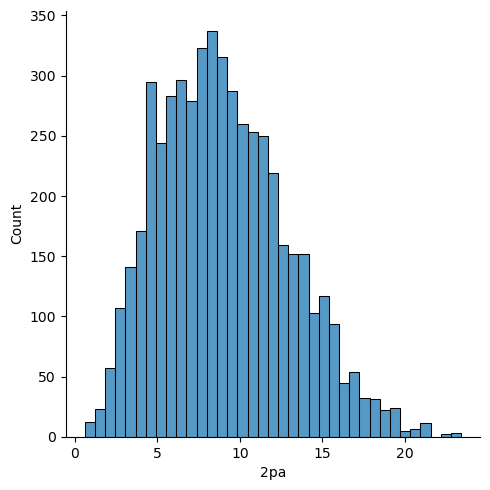

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


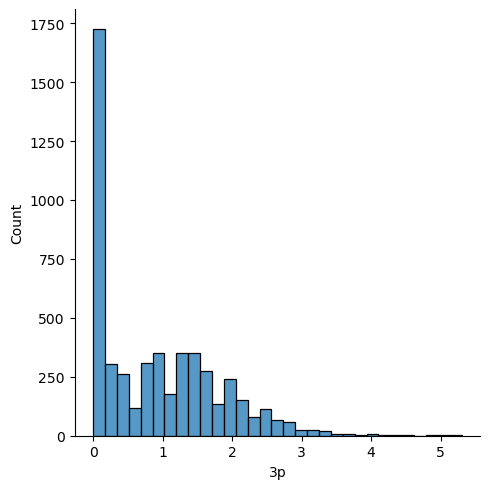

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


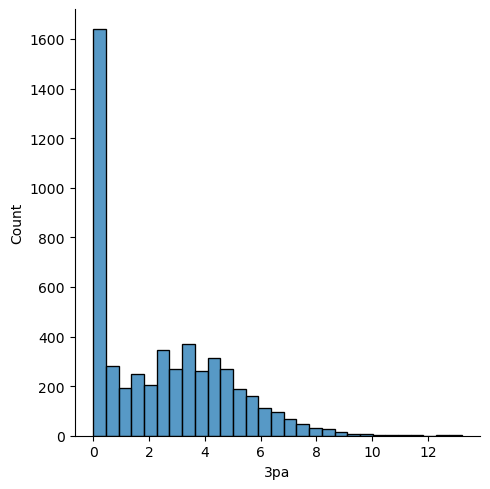

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


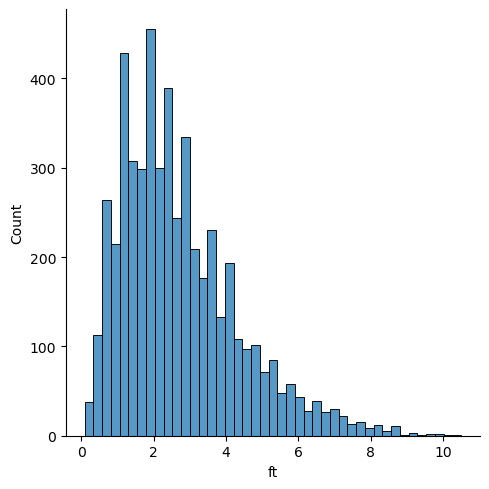

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


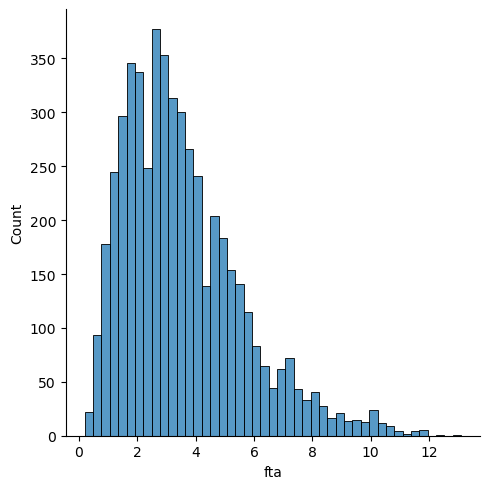

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


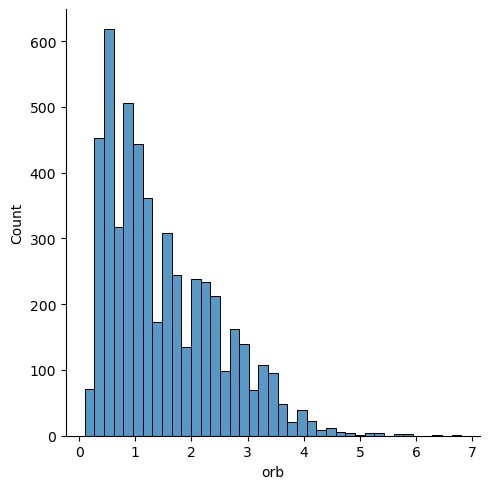

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


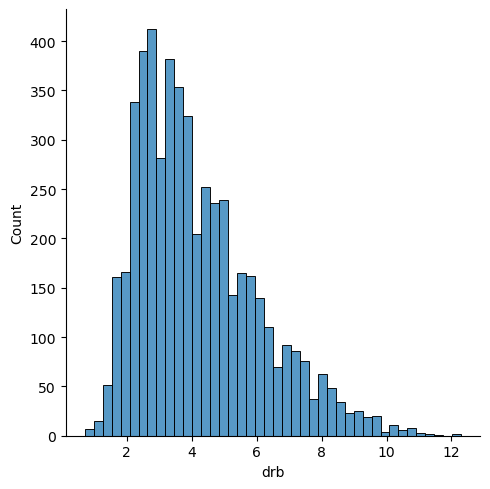

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


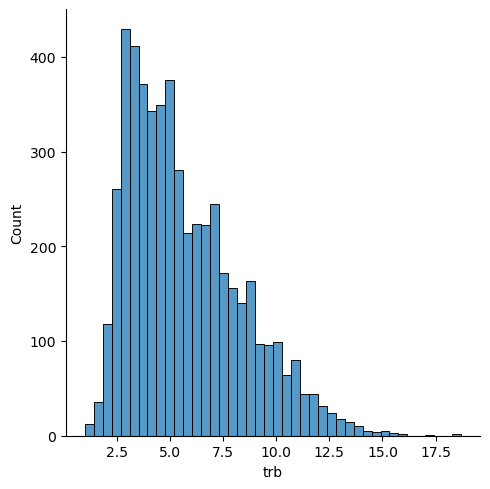

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


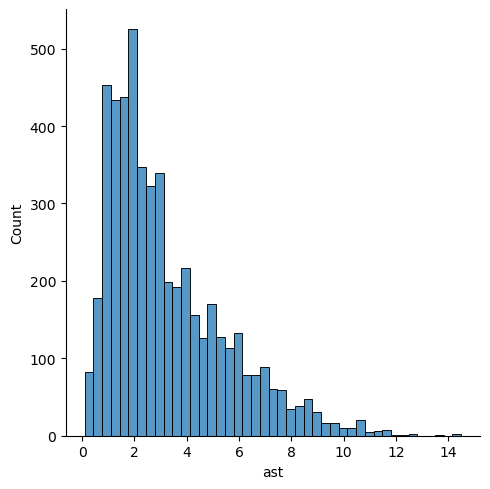

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


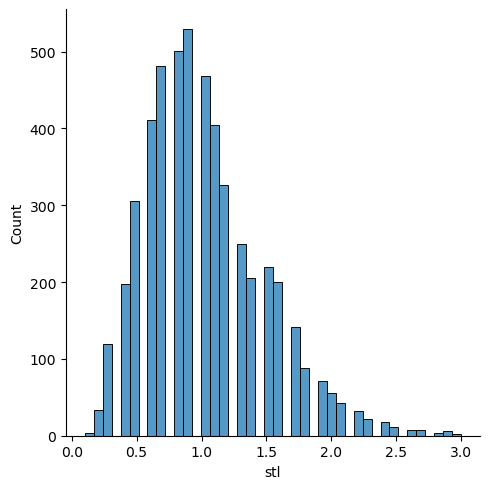

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


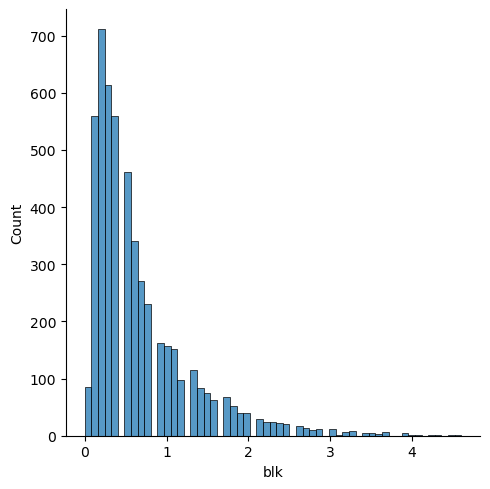

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


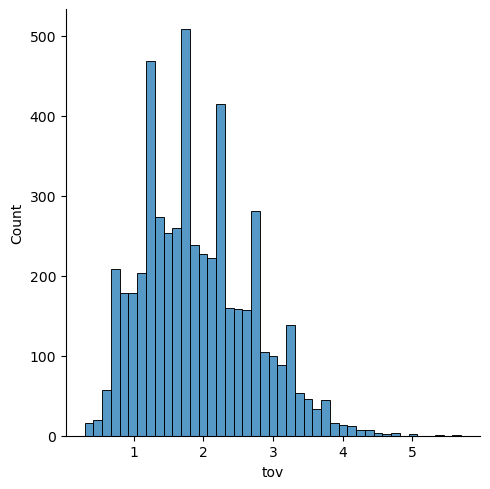

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


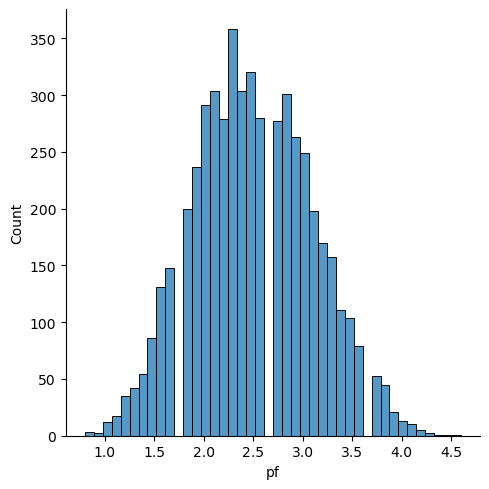

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


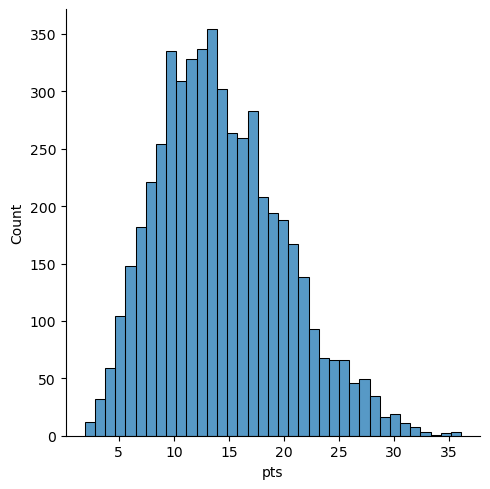

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


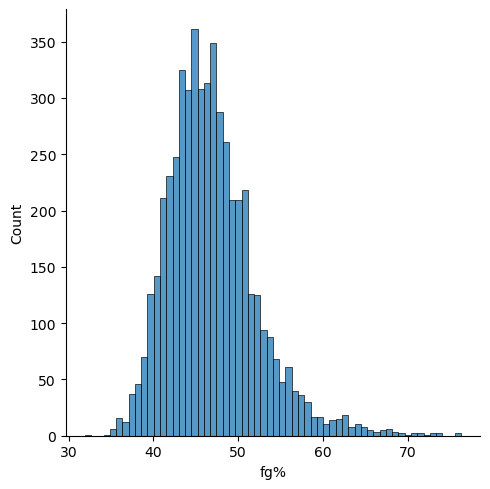

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


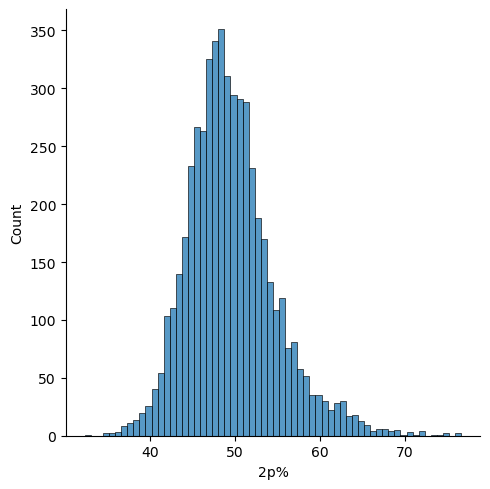

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


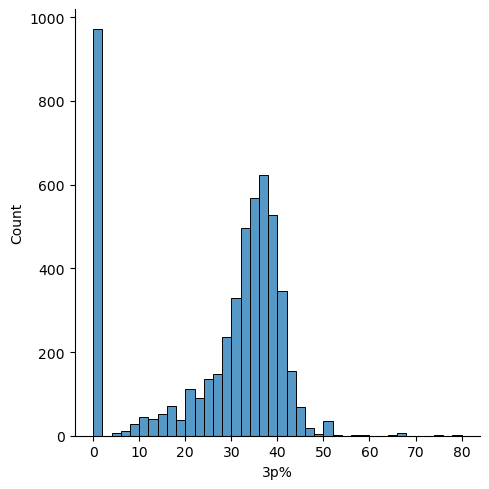

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


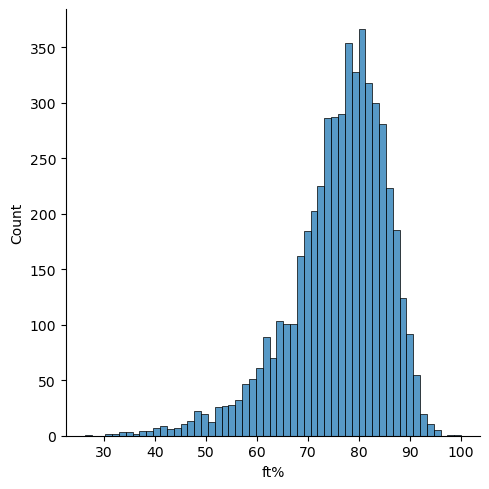

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


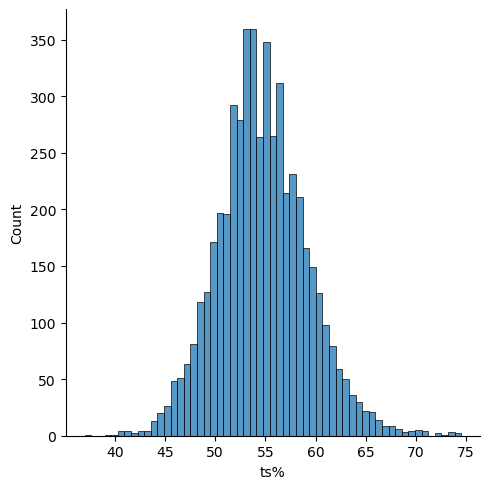

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


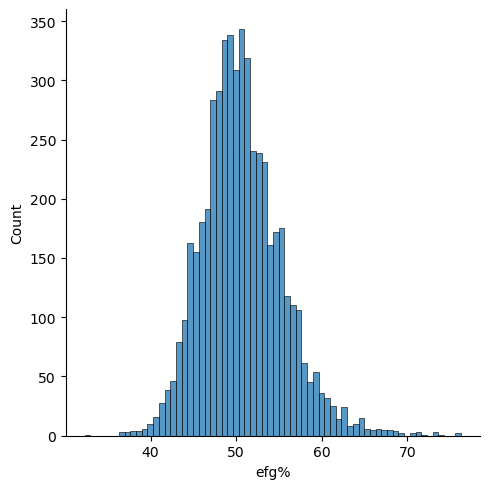

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


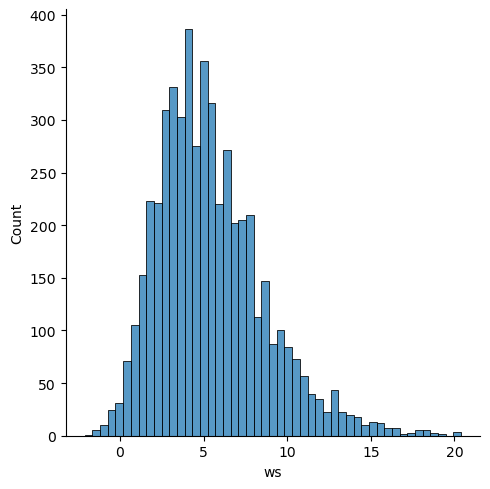

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


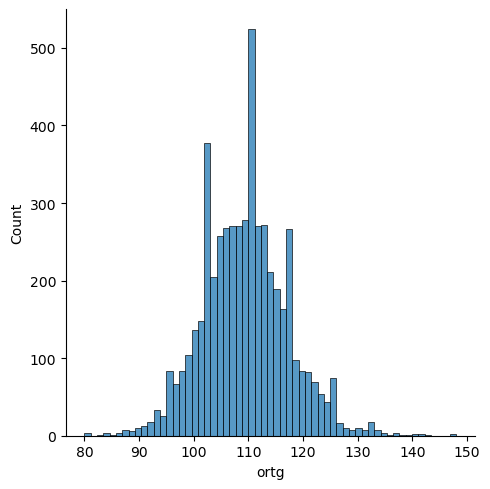

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


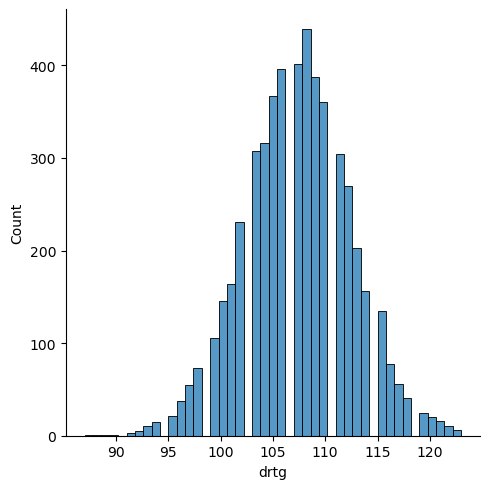

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


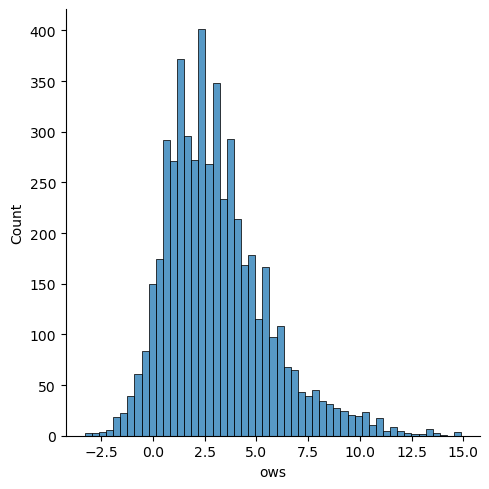

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


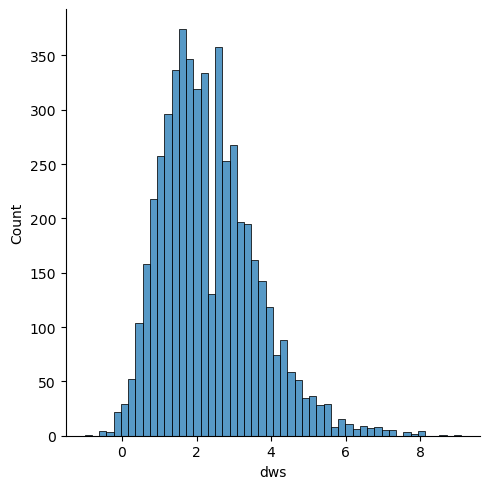

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


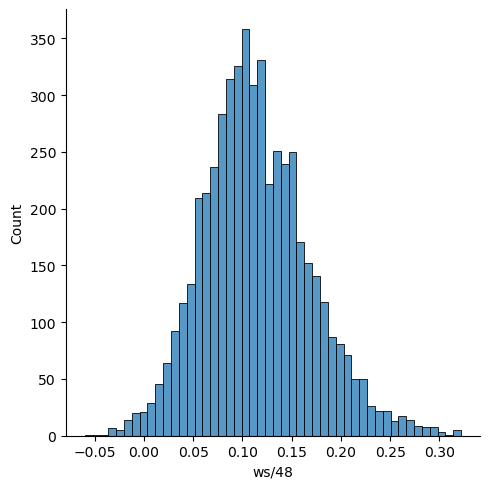

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


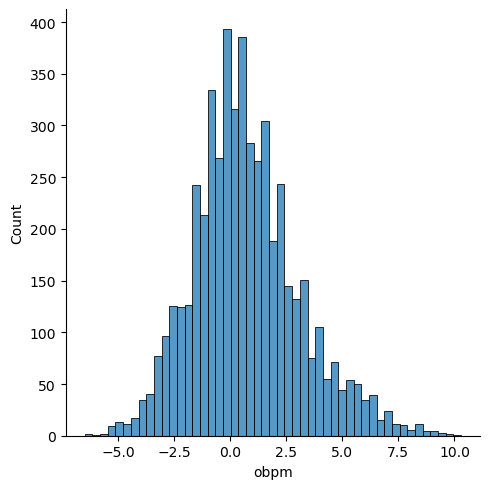

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


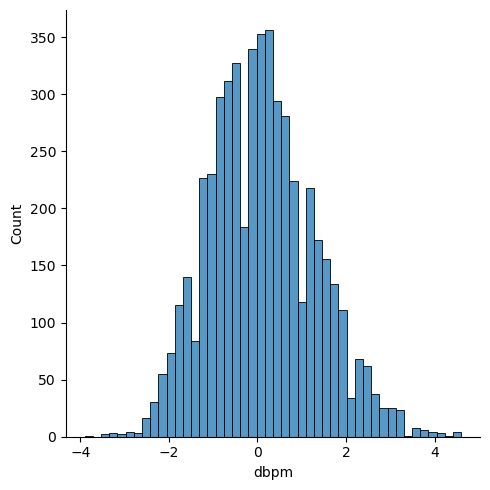

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


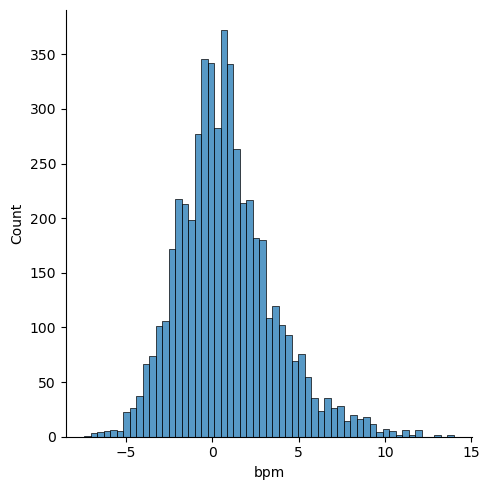

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


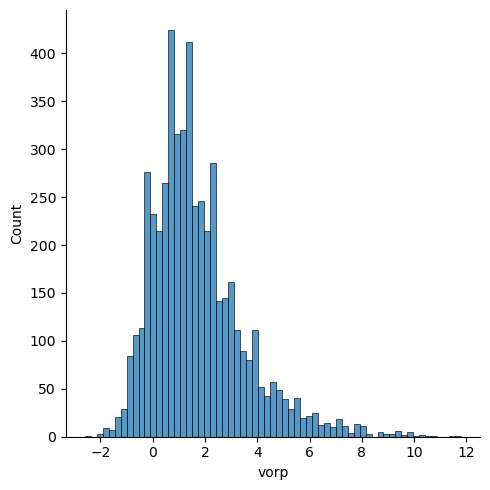

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


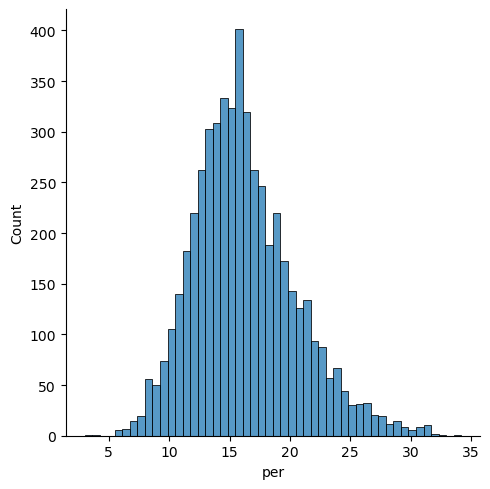

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


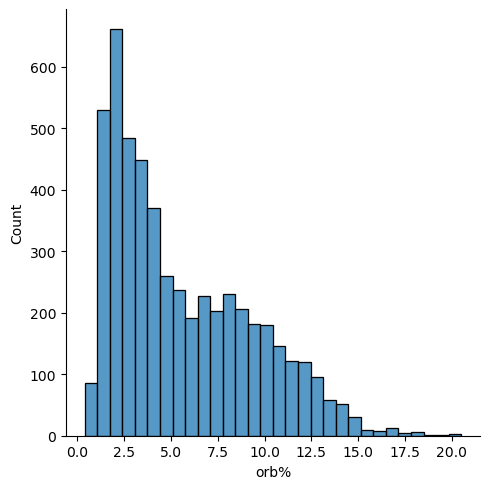

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


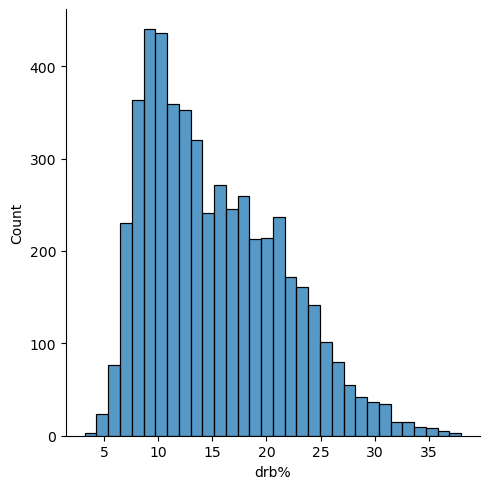

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


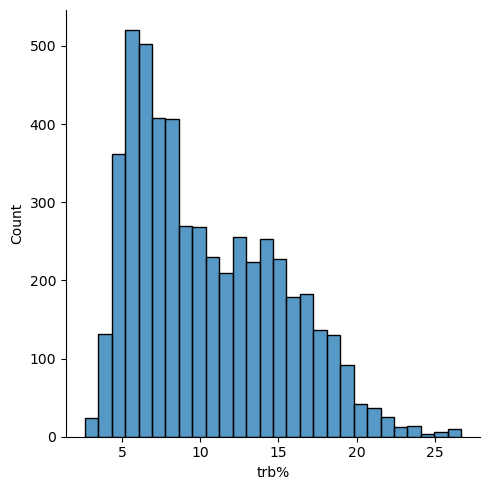

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


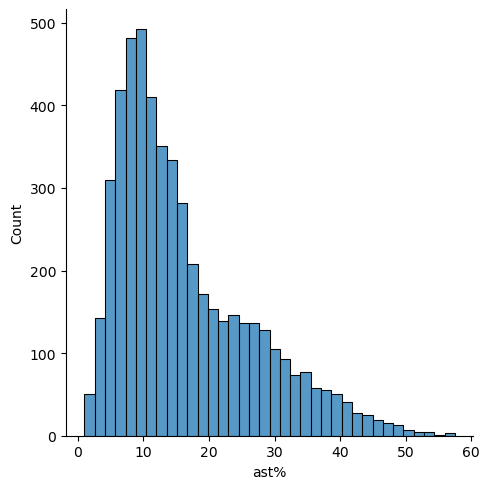

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


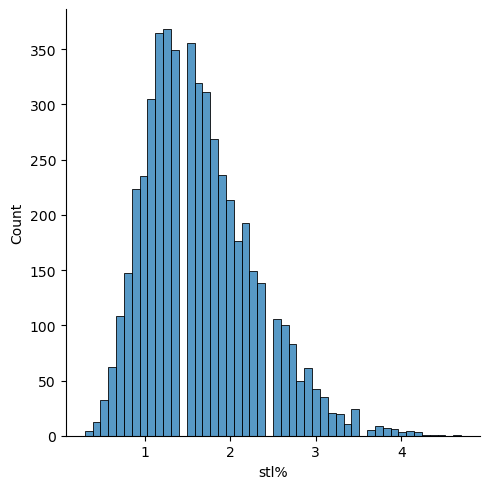

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


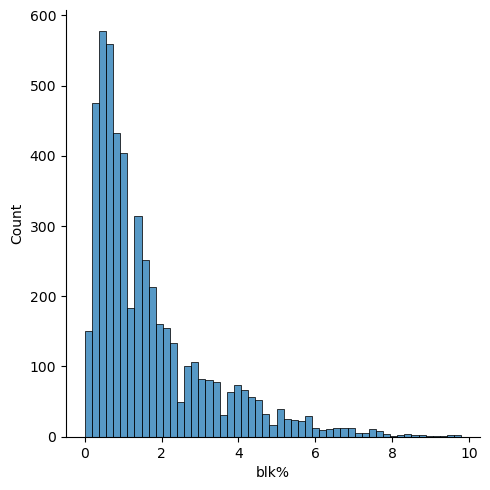

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


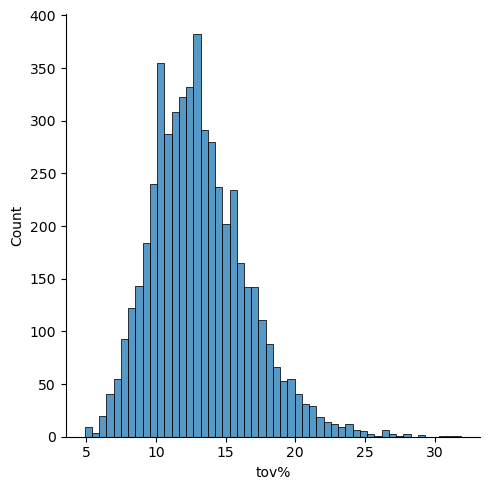

None


C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


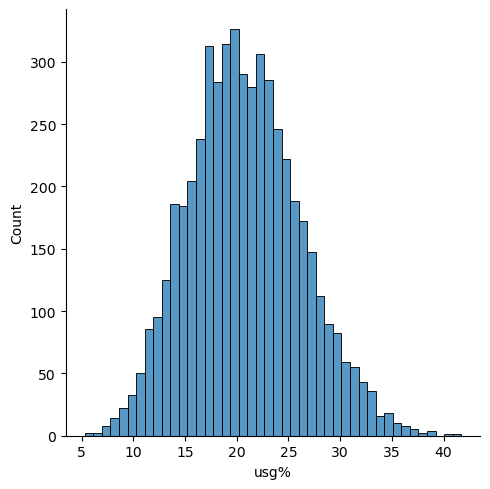

None


In [9]:
# plot all numerical columns
for col in player_complete_num.columns:
    sns.displot(player_complete_num[col])
    print(plt.show())
    
# the majority of these variables have a normal distribution and some of them have an exponential distribution
# I noticed there are outliers in the '3p', '3pa' and '3p%' columns, but they are true values.

In [10]:
player_complete_cat.columns

Index(['player', 'season', 'as', 'played_for', 'pos_1', 'pos_2',
       'all_nba_team_label'],
      dtype='object')

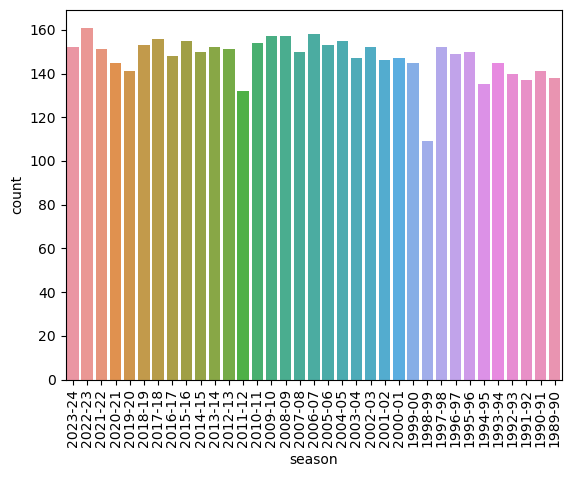

None


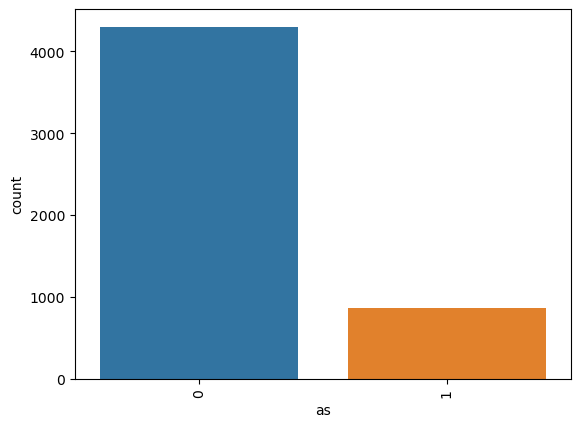

None


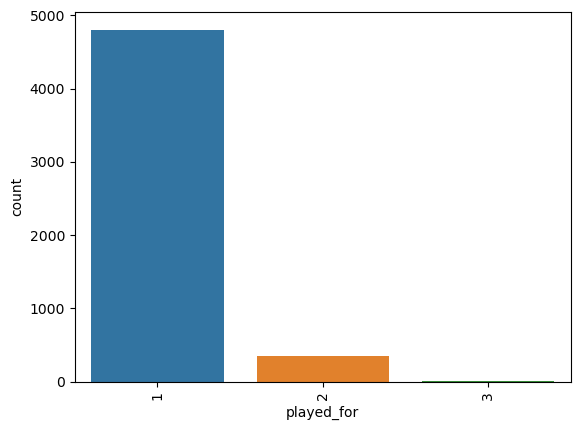

None


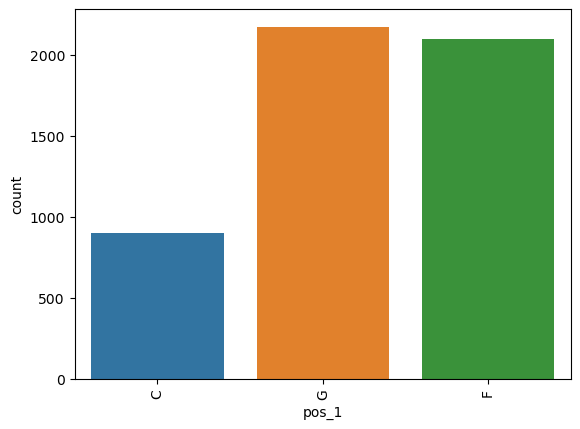

None


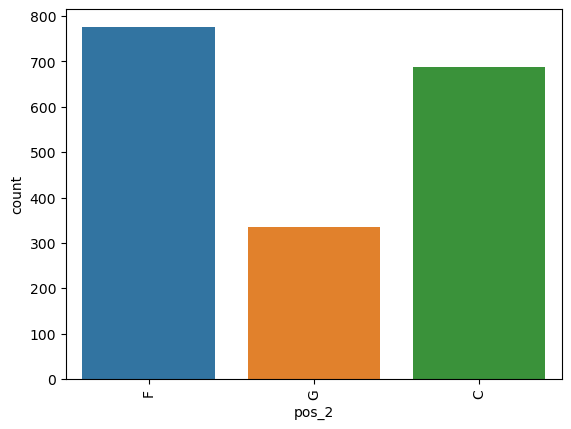

None


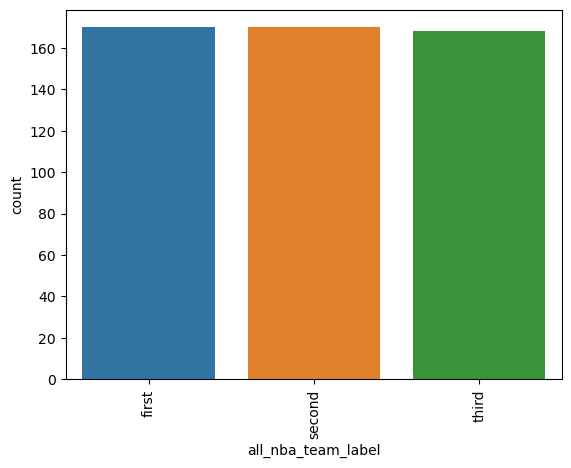

None


In [11]:
# make a list of columns without 'player' column as there are too many unique values
cat_to_plot = ['season', 'as', 'played_for', 'pos_1', 'pos_2', 'all_nba_team_label']

# plot categorical variables
for col in cat_to_plot:
    sns.countplot(x=player_complete_cat[col][player_complete_cat[col]!='NA'])
    plt.xticks(rotation=90)
    print(plt.show())
    
# categorical variables distributions seem to be all right